## Reading and Understanding the Data

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [135]:
# amount spent on the marketing using TV, Radio and Newspaper 

In [254]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [255]:
advertising.shape

(200, 4)

In [256]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [257]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualising the Data

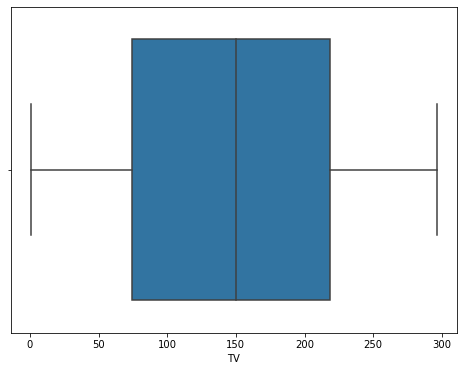

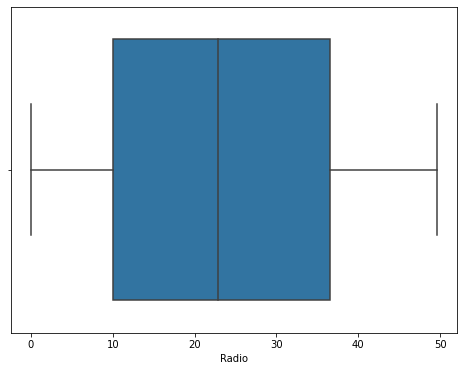

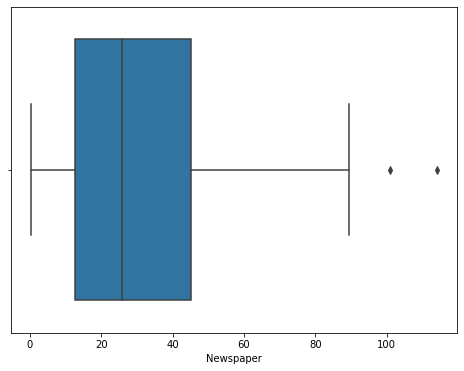

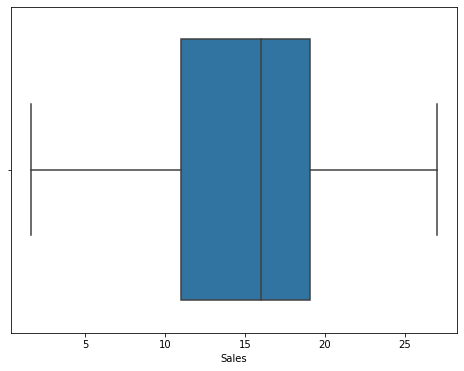

In [258]:
for var in advertising.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(advertising[var])
    plt.show()

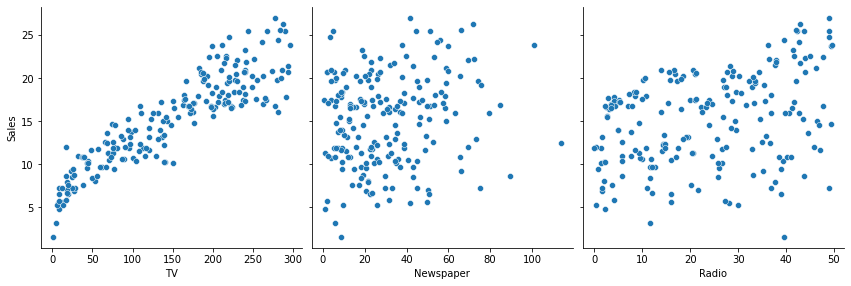

In [259]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:>

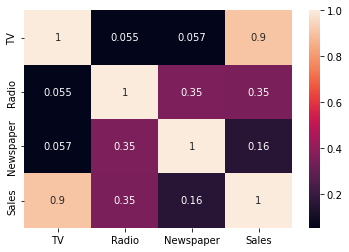

In [260]:
sns.heatmap(advertising.corr(), annot = True)

The target variable 'Sales' is highly correlated with the feature TV, then Radio and then Newspaper

# Model Building Without scaling the variables 

In [261]:
advertising1 = advertising.copy()

In [262]:
X = advertising1[['TV', 'Radio', 'Newspaper']]
y = advertising1['Sales']

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### train test split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

In [265]:
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [266]:
X_train.head()

,TV,Radio,Newspaper
119,19.4,16.0,22.3
110,225.8,8.2,56.5
95,163.3,31.6,52.9
167,206.8,5.2,19.4
193,166.8,42.0,3.6


In [291]:
y_test.head()

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
Name: Sales, dtype: float64

## Using Linear Regression Model

In [248]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [249]:
lr_model.score(X_test, y_test)

0.9032402609859365

## Using Ordinary Least Square method

### Model 1

In [250]:
import statsmodels.api as sm

In [267]:
X_train_sm = sm.add_constant(X_train)
sm_ols = sm.OLS(y_train, X_train_sm)
sm_ols_model_1 = sm_ols.fit()

In [268]:
sm_ols_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     406.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.13e-67
Time:                        16:41:00   Log-Likelihood:                -258.26
No. Observations:                 140   AIC:                             524.5
Df Residuals:                     136   BIC:                             536.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9123      0.351     14.010      0.000       4.219       5.606
TV             0.0524      0.002     32.158      0.000       0.049       0.056
Radio          0.1075      0.010     11.221      0.000       0.089       0.126
Newspaper      0.0004      0.006      0.068      0.946      -0.012       0.013
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.670
Skew:                          -0.074   Prob(JB):                        0.715
Kurtosis:                       3.305   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
sm_ols_model_1.params

const        4.912326
TV           0.052393
Radio        0.107522
Newspaper    0.000434
dtype: float64

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [271]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,7.14
2,Radio,1.11
3,Newspaper,1.11
1,TV,1.01


Removing variable Newspaper in the second model as it's p-value is more than 0.05 and it becomes statistically insignificant. It will not give accurate results on a given population. 

### Model 2

In [272]:
X = X_train.drop('Newspaper', axis = 1)

X_train_sm = sm.add_constant(X)
sm_ols = sm.OLS(y_train, X_train_sm)
sm_ols_model_2 = sm_ols.fit()

In [273]:
sm_ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     614.0
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.05e-69
Time:                        16:41:25   Log-Likelihood:                -258.26
No. Observations:                 140   AIC:                             522.5
Df Residuals:                     137   BIC:                             531.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9204      0.329     14.977      0.000       4.271       5.570
TV             0.0524      0.002     32.318      0.000       0.049       0.056
Radio          0.1077      0.009     11.868      0.000       0.090       0.126
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.678
Skew:                          -0.077   Prob(JB):                        0.712
Kurtosis:                       3.304   Cond. No.                         421.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.31
1,TV,1.00
2,Radio,1.00


In [276]:
sm_ols_model_2.params

const    4.920382
TV       0.052398
Radio    0.107723
dtype: float64

In [277]:
y_train_pred = sm_ols_model_2.predict(X_train_sm)

## Residual Analysis 

In [278]:
res = y2_train - y2_train_pred

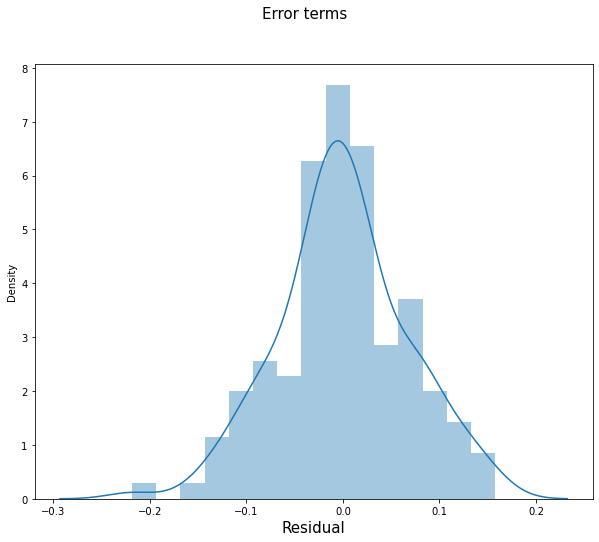

In [279]:
fig = plt.figure(figsize=(10,8))
sns.distplot(res)
plt.xlabel('Residual', fontsize = 15)
fig.suptitle('Error terms', fontsize = 15)
plt.show()

The error terms follow a normal distribution with a mean zero, which validates are assumptions.

## Predictions on the test set

In [180]:
X_test.head()

,TV,Radio,Newspaper
59,210.7,29.5,9.3
5,8.7,48.9,75.0
20,218.4,27.7,53.4
198,283.6,42.0,66.2
52,216.4,41.7,39.6


In [181]:
X_test_new = X_test[['TV', 'Radio']]

In [182]:
X_test_new_sm = sm.add_constant(X_test_new)
y_test_pred = sm_lr_model_2.predict(X_test_new_sm)

In [183]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [184]:
r2_score(y_test, y_test_pred)

0.9032446860354868

In [186]:
adj_r2 = 1-(1-r2)*(60-1)/(60-2-1)
adj_r2

0.8998451824240394

In [280]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

1.530784320384843

In [185]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

1.911796849352248

- TV and Radio are statistically significant variables
- Equation of the best fit line, 
   **Sales = (0.052398 * TV) + (0.107723 * Radio) + 4.920382**

In [283]:
results = pd.DataFrame({"Model Performance Metrics":["R-Squared","Adjusted R-Squared","RMSE"],
                         "Train Set":[0.900,0.898,1.5307],
                         "Test Set":[0.903,0.899,1.9117]})

In [284]:
results

,Model Performance Metrics,Train Set,Test Set
0,R-Squared,0.9000,0.9030
1,Adjusted R-Squared,0.8980,0.8990
2,RMSE,1.5307,1.9117


# Model Building After Scaling the variables 

In [193]:
advertising2 = advertising.copy()

In [194]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [195]:
advertising2_train, advertising2_test = train_test_split(advertising2, train_size=0.7, random_state=10)

In [196]:
num_var = ['TV', 'Radio', 'Newspaper', 'Sales']

In [197]:
scaler = MinMaxScaler()
advertising2_train[num_var] = scaler.fit_transform(advertising2_train[num_var])

In [198]:
advertising2_train.head()

,TV,Radio,Newspaper,Sales
119,0.052850,0.319756,0.193492,0.147826
110,0.765803,0.160896,0.494283,0.660870
95,0.549914,0.637475,0.462621,0.595652
167,0.700173,0.099796,0.167986,0.608696
193,0.562003,0.849287,0.029024,0.713043


In [199]:
X2_train = advertising2_train[['TV', 'Radio', 'Newspaper']]
y2_train = advertising2_train['Sales']

In [200]:
advertising2_test[num_var] = scaler.transform(advertising2_test[num_var])

In [201]:
X2_test = advertising2_test[['TV', 'Radio', 'Newspaper']]
y2_test = advertising2_test['Sales']

## Using Linear Regression method

In [202]:
lr = LinearRegression()
lr_model = lr.fit(X2_train, y2_train)

In [203]:
lr_model.score(X2_test, y2_test)

0.9032402609859363

## Using Ordinary Least Square method

In [204]:
X2_train_sm = sm.add_constant(X2_train)

sm_lr = sm.OLS(y2_train, X2_train_sm)
sm_lr_model = sm_lr.fit()

In [205]:
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     406.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.13e-67
Time:                        16:30:21   Log-Likelihood:                 180.71
No. Observations:                 140   AIC:                            -353.4
Df Residuals:                     136   BIC:                            -341.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0852      0.015      5.686      0.000       0.056       0.115
TV             0.6595      0.021     32.158      0.000       0.619       0.700
Radio          0.2295      0.020     11.221      0.000       0.189       0.270
Newspaper      0.0021      0.032      0.068      0.946      -0.061       0.065
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.670
Skew:                          -0.074   Prob(JB):                        0.715
Kurtosis:                       3.305   Cond. No.                         7.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.31
1,TV,1.00
2,Radio,1.00


In [207]:
X2 = X2_train.drop('Newspaper', axis = 1)

X2_train_sm = sm.add_constant(X2)

sm_lr = sm.OLS(y2_train, X2_train_sm)
sm_lr_model_2  = sm_lr.fit()
sm_lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     614.0
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.05e-69
Time:                        16:30:25   Log-Likelihood:                 180.71
No. Observations:                 140   AIC:                            -355.4
Df Residuals:                     137   BIC:                            -346.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0855      0.014      6.102      0.000       0.058       0.113
TV             0.6595      0.020     32.318      0.000       0.619       0.700
Radio          0.2300      0.019     11.868      0.000       0.192       0.268
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.678
Skew:                          -0.077   Prob(JB):                        0.712
Kurtosis:                       3.304   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
vif = pd.DataFrame()
vif['Features'] = X2_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X2_train_sm.values, i) for i in range(X2_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,6.08
1,TV,1.00
2,Radio,1.00


In [209]:
sm_lr_model_2.params

const    0.085545
TV       0.659537
Radio    0.229966
dtype: float64

## Residual Analysis

In [210]:
y2_train_pred = sm_lr_model_2.predict(X2_train_sm)
res = y2_train - y2_train_pred

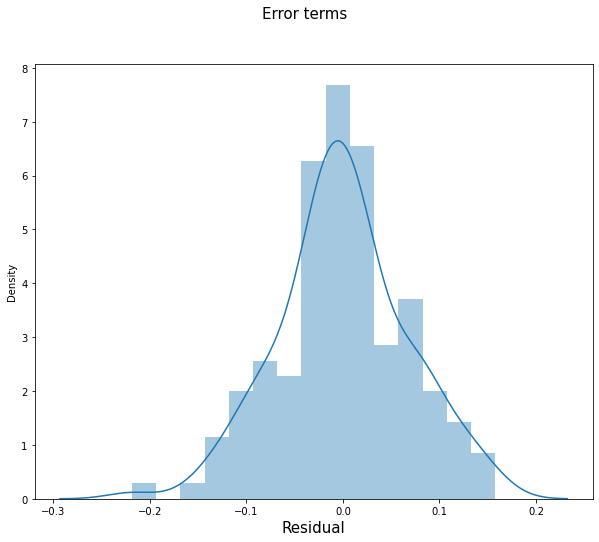

In [211]:
fig = plt.figure(figsize=(10,8))
sns.distplot(res)
plt.xlabel('Residual', fontsize = 15)
fig.suptitle('Error terms', fontsize = 15)
plt.show()

In [212]:
X2_test_new = X2_test[['TV', 'Radio']]

In [214]:
X2_test_sm = sm.add_constant(X2_test_new)

y2_test_pred = sm_lr_model_2.predict(X2_test_sm)

In [308]:
type(y2_test_pred)

pandas.core.series.Series

In [215]:
r2 = r2_score(y2_test, y2_test_pred)

In [216]:
r2

0.9032446860354867

In [217]:
adj_r2 = 1-(1-r2)*(60-1)/(60-2-1)
adj_r2

0.8998497627384863

In [219]:
np.sqrt(mean_squared_error(y2_train, y2_train_pred))

0.0665558400167323

In [218]:
np.sqrt(mean_squared_error(y2_test, y2_test_pred))

0.08312160214574991

Text(0.5, 1.0, 'y2_test Vs y2_test_pred')

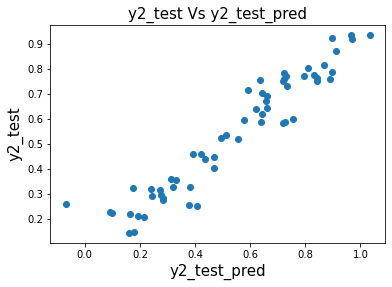

In [145]:
plt.scatter(y2_test, y2_test_pred)
plt.xlabel("y2_test_pred", fontsize = 15)
plt.ylabel("y2_test", fontsize = 15)
plt.title("y2_test Vs y2_test_pred", fontsize = 15)

# Results 

- TV and Radio are statistically significant variables
- Equation of the best fit line, 
   **Sales = (0.659537 * TV) + (0.229966 * Radio) + 0.085545**

In [281]:
results = pd.DataFrame({"Model Performance Metrics":["R-Squared","Adjusted R-Squared","RMSE"],
                         "Train Set":[0.900,0.898,0.0665],
                         "Test Set":[0.903,0.899,0.0831]})

In [282]:
results

,Model Performance Metrics,Train Set,Test Set
0,R-Squared,0.9000,0.9030
1,Adjusted R-Squared,0.8980,0.8990
2,RMSE,0.0665,0.0831


<IPython.core.display.Javascript object>


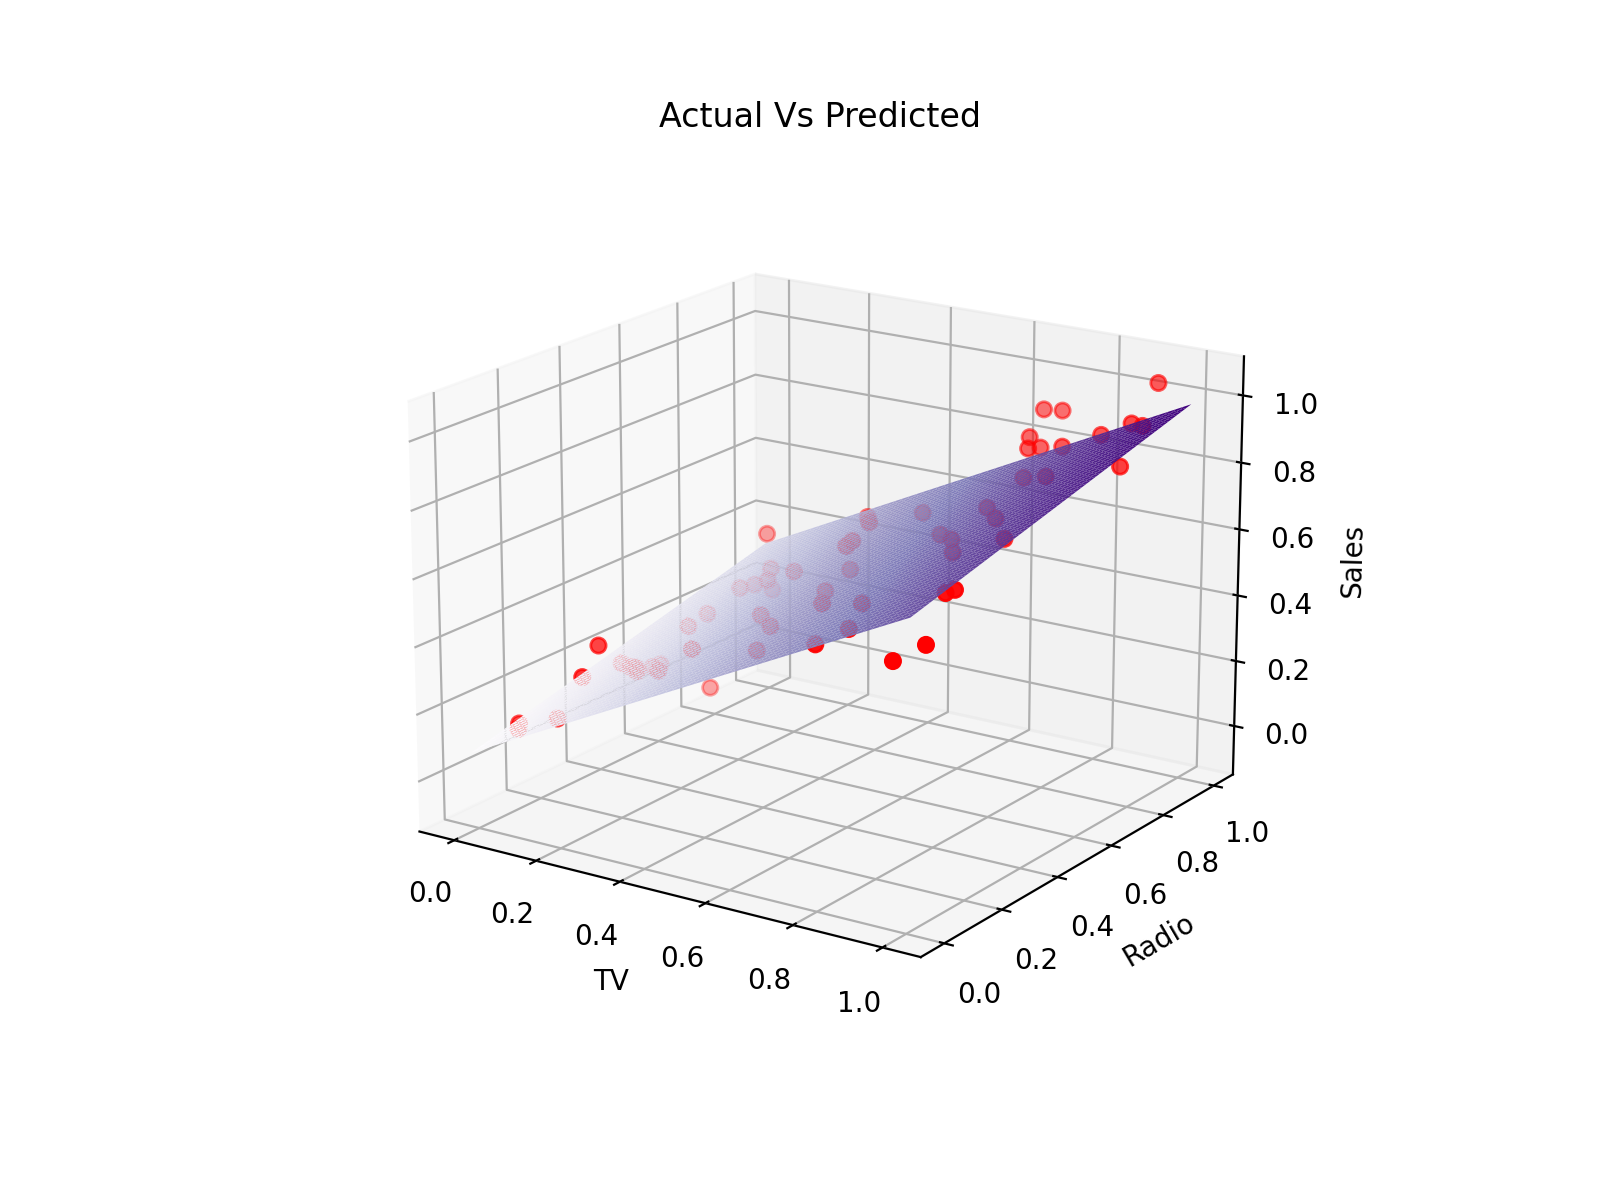

In [346]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook



def f(TV, Radio):
    return((0.659537 * TV) + (0.229966 * Radio) + 0.085545)

n = len(X2_test)
TV = np.linspace(X2_test.TV.min(), X2_test.TV.max(), n)
Radio = np.linspace(X2_test.Radio.min(), X2_test.Radio.max(), n)

X1, X2 = np.meshgrid(TV, Radio)
Z = f(X1, X2)

fig = plt.figure(figsize = (8, 6))

ax = plt.axes(projection='3d')
ax.scatter3D(X2_test['TV'], X2_test['Radio'], y2_test, color = 'red', s = 30)
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap='Purples', edgecolor='none')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Actual Vs Predicted')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

plt.show()